In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
def find_cat_num_cols(df):
    cat_cols = []
    num_cols = []
    for col in df.columns:
        if df[col].dtype == object:
            cat_cols.append(col)
        else:
            num_cols.append(col)
    return cat_cols, num_cols


## NYT articles from 2020

Only contains abstracts, need full articles I think

In [4]:
df = pd.read_csv("nyt-articles-2020.csv")

df.head()


,newsdesk,section,subsection,material,headline,abstract,keywords,word_count,pub_date,n_comments,uniqueID
0,Editorial,Opinion,NaN,Editorial,Protect Veterans From Fraud,Congress could do much more to protect America...,"['Veterans', 'For-Profit Schools', 'Financial ...",680,2020-01-01 00:18:54+00:00,186,nyt://article/69a7090b-9f36-569e-b5ab-b0ba5bb3...
1,Games,Crosswords & Games,NaN,News,‘It’s Green and Slimy’,Christina Iverson and Jeff Chen ring in the Ne...,['Crossword Puzzles'],931,2020-01-01 03:00:10+00:00,257,nyt://article/9edddb54-0aa3-5835-a833-d311a76f...
2,Science,Science,NaN,News,Meteor Showers in 2020 That Will Light Up Nigh...,"All year long, Earth passes through streams of...","['Meteors and Meteorites', 'Space and Astronom...",1057,2020-01-01 05:00:08+00:00,6,nyt://article/04bc90f0-b20b-511c-b5bb-3ce13194...
3,Science,Science,NaN,Interactive Feature,Sync your calendar with the solar system,"Never miss an eclipse, a meteor shower, a rock...","['Space and Astronomy', 'Moon', 'Eclipses', 'S...",0,2020-01-01 05:00:12+00:00,2,nyt://interactive/5b58d876-9351-50af-9b41-a312...
4,Science,Science,NaN,News,"Rocket Launches, Trips to Mars and More 2020 S...",A year full of highs and lows in space just en...,"['Space and Astronomy', 'Private Spaceflight',...",1156,2020-01-01 05:02:38+00:00,25,nyt://article/bd8647b3-8ec6-50aa-95cf-2b81ed12...


In [7]:
cat_cols, num_cols = find_cat_num_cols(df)
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)


Categorical columns: ['newsdesk', 'section', 'subsection', 'material', 'headline', 'abstract', 'keywords', 'pub_date', 'uniqueID']
Numerical columns: ['word_count', 'n_comments']


In [ ]:
# Loop through each categorical column and create a bar plot
for col in cat_cols:
    fig, ax = plt.subplots()
    value_counts = df[col].value_counts().nlargest(10)
    value_counts.plot.bar(ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Categories')
    ax.set_ylabel('Frequency')
    plt.show()

## NYT Articles over 100 years

In [3]:
df = pd.read_parquet('nyt_data.parquet')

In [ ]:
df.head()




## Medium articles

In [5]:
df = pd.read_csv("medium_articles.csv")

#df.head()


In [6]:

df['word_count'] = df['text'].apply(lambda x: len(str(x).split()))

#df.head()

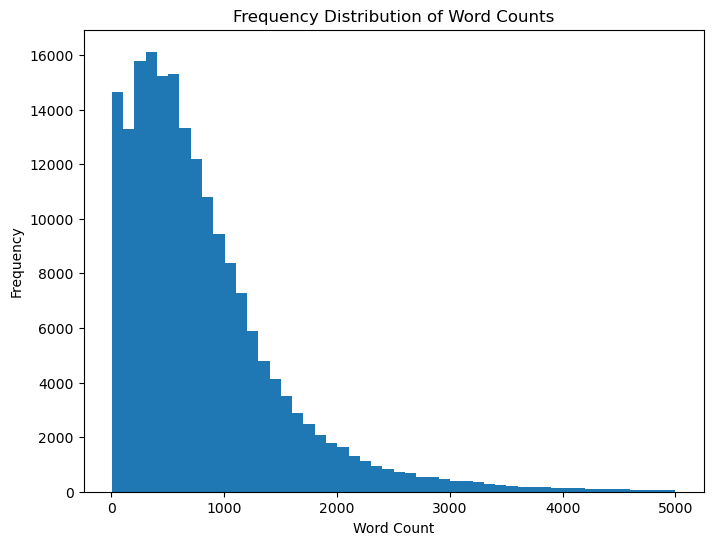

In [7]:
# Set a limit on the maximum word count to be included in the plot
max_word_count = 5000
word_counts = df[df['word_count'] <= max_word_count]['word_count']

# Plot frequency distribution of word counts
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(word_counts, bins=50)
ax.set_title('Frequency Distribution of Word Counts')
ax.set_xlabel('Word Count')
ax.set_ylabel('Frequency')
plt.show()


### filter original dataframe for articles between 900 and 1100 words

In [8]:
# Create a new DataFrame with articles between 975 and 1025 words
df_filtered = df.loc[(df['word_count'] >= 975) & (df['word_count'] <= 1025)].copy()

# Find the number of rows in the filtered dataframe
num_articles = len(df_filtered)

print(f"There are {num_articles} articles with a word count between 975 and 1025.")


There are 4691 articles with a word count between 975 and 1025.


In [9]:
df_filtered.reset_index(drop=True, inplace=True)
df_filtered.insert(0, 'article_id', range(1, 1+len(df_filtered)))


df_filtered.head()

,article_id,title,text,url,authors,timestamp,tags,word_count
0,1,The Path to Becoming a Doctor Requires Stamina,Dr. Chris Meinzen is a hospitalist at St. Mary...,https://medium.com/an-idea/the-path-to-becomin...,['Carbon Radio'],2020-10-22 18:38:27.792000+00:00,"['Sustainability', 'Health', 'Medicine', 'Futu...",1024
1,2,How to Silence the Haters in Your Head as You ...,But then self-doubt crept in. I started thinki...,https://medium.com/blankpage/how-to-silence-th...,['Paul Ryburn'],2020-12-21 15:51:26.790000+00:00,"['Writing', 'Psychology', 'Self Improvement', ...",1018
2,3,We need a reset on how we think about the futu...,We need a reset on how we think about the futu...,https://medium.com/edge-of-innovation/we-need-...,['Andrew Maynard'],2020-11-08 00:11:00.943000+00:00,"['Society', 'Technology', 'Future', 'Science',...",1008
3,4,The Neuroscience of Slowing Down to Accomplish...,The Neuroscience of Slowing Down to Accomplish...,https://medium.com/the-innovation/the-neurosci...,['Sarah K Brandis'],2020-11-26 18:22:25.243000+00:00,"['Productivity', 'Careers', 'Wisdom', 'Entrepr...",993
4,5,Not Taking Marketing Seriously Taught Me a Bit...,Not Taking Marketing Seriously Taught Me a Bit...,https://medium.com/illumination-curated/not-ta...,['Harun Güneş'],2020-12-06 12:20:55.414000+00:00,"['Business', 'Startup', 'Marketing', 'Entrepre...",1006


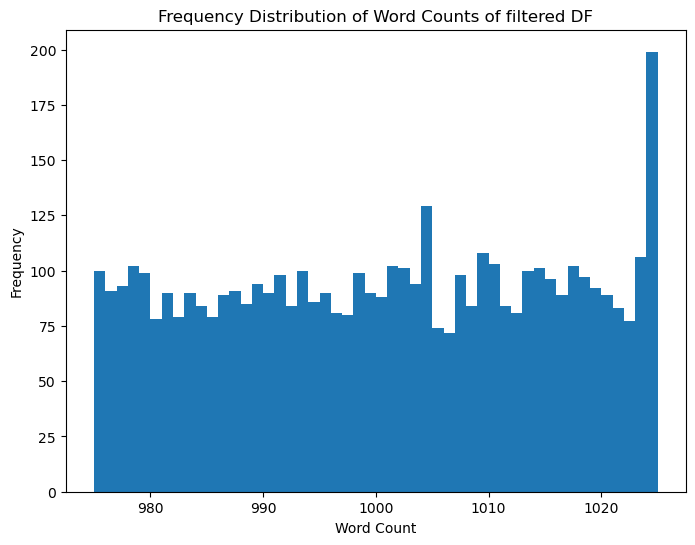

In [10]:
# Set a limit on the maximum word count to be included in the plot
max_word_count = 5000
word_counts = df_filtered[df_filtered['word_count'] <= max_word_count]['word_count']

# Plot frequency distribution of word counts
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(word_counts, bins=50)
ax.set_title('Frequency Distribution of Word Counts of filtered DF')
ax.set_xlabel('Word Count')
ax.set_ylabel('Frequency')
plt.show()


In [11]:
cat_cols, num_cols = find_cat_num_cols(df_filtered)
print("Categorical columns:", cat_cols)
print("Numerical columns:", num_cols)

# type(med_df['tags'][1])


Categorical columns: ['title', 'text', 'url', 'authors', 'timestamp', 'tags']
Numerical columns: ['article_id', 'word_count']


In [12]:
import ast

# Convert string representation of lists to actual lists
df_filtered['tags'] = df_filtered['tags'].apply(lambda x: ast.literal_eval(x))

# Flatten the nested tag lists
tags = [tag for tags in df_filtered['tags'] for tag in tags]

print(tags)


['Sustainability', 'Health', 'Medicine', 'Future', 'Healthcare', 'Writing', 'Psychology', 'Self Improvement', 'Fear', 'Self-awareness', 'Society', 'Technology', 'Future', 'Science', 'Election 2020', 'Productivity', 'Careers', 'Wisdom', 'Entrepreneurship', 'Neuroscience', 'Business', 'Startup', 'Marketing', 'Entrepreneurship', 'Digital Marketing', 'Feathersjs', 'Development', 'Data Engineering', 'AWS', 'Docker', 'Health', 'Happiness', 'Mental Health', 'Self', 'Psychology', 'Architecture', 'Design', 'Industry', 'Entrepreneurship', 'Science', 'Freelancing', 'Nonfiction', 'Writing', 'Marketing', 'Self', 'Marketing', 'Business', 'Creativity', 'Personal Development', 'Writing', 'Headline Hacks', 'Business', 'Productivity', 'Creativity', 'Writing', 'Creativity', 'Productivity', 'Habits', 'Ninjabyob', 'Writing', 'Science', 'Data Science', 'Health', 'Coronavirus', 'Women', 'Writing', 'Mental Health', 'Health', 'Motherhood', 'Mapping', 'Weather', 'Plotly', 'Climate Change', 'Data Visualization',

/var/folders/00/d2rtv3d50bg4lk8kjxc_wybc0000gn/T/ipykernel_91646/390357528.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(top_tags.index, rotation=90, ha='right')


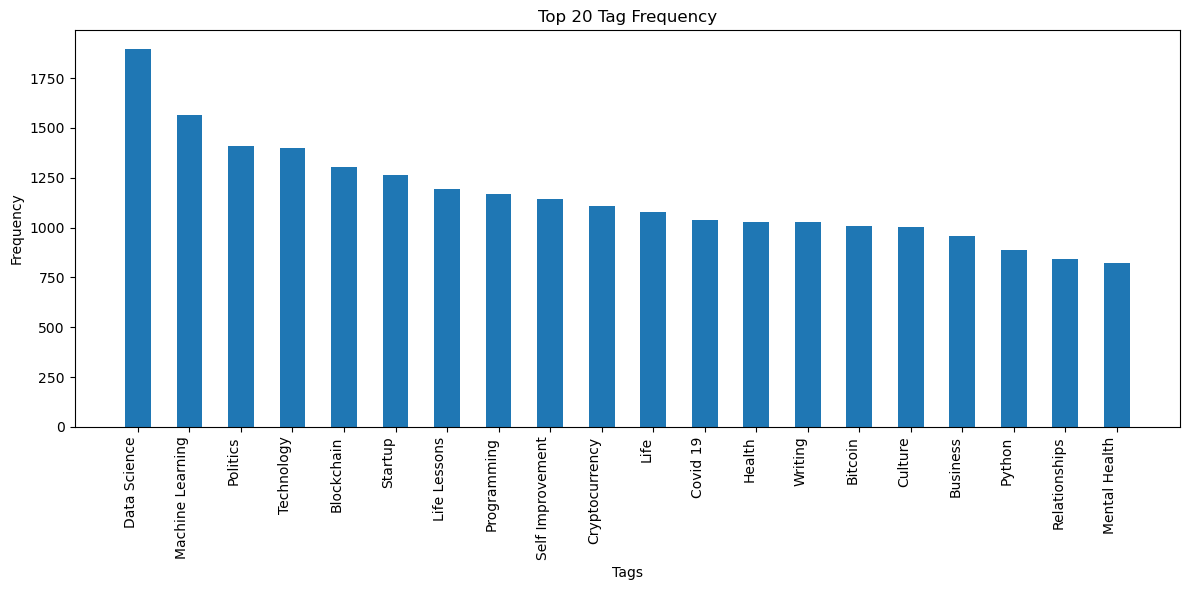

In [13]:
# Create a pandas series of the tag counts
tag_counts = pd.Series(tags).value_counts(normalize=True)

# Get the top 20 tags and their frequency
top_tags = tag_counts.head(20)
top_tags_freq = (top_tags * len(df))

# Filter out tags that occur very infrequently
tag_counts = tag_counts[tag_counts >= 0.001]

# Create the frequency plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(top_tags.index, top_tags_freq, width=0.5)
ax.set_xticklabels(top_tags.index, rotation=90, ha='right')
ax.set_title('Top 20 Tag Frequency')
ax.set_xlabel('Tags')
ax.set_ylabel('Frequency')
plt.tight_layout()
plt.show()


In [14]:
df_filtered['text'][0]

'Dr. Chris Meinzen is a hospitalist at St. Mary’s Hospital in Grand Junction, Colorado. He earned his bachelor’s degree in creative writing and neuroscience at Tulane University in New Orleans, followed by working at the Red Cross, and eventually by medical school also at Tulane.\n\nHow did you decide to go to medical school?\n\nI was a little bumbling at that age. I liked school, enjoyed learning, and had some good friends going in that direction. My family encouraged me to try it out, and here I am 10 years later.\n\nDid you consider other healthcare or public health tracks?\n\nI didn’t, but mostly due to lack of exposure. I think the larger impact of public health is really interesting. I’m not sure I had ever really considered other healthcare tracks, though there are a lot to look at for sure. The physical and occupational therapists always seem the happiest in the hospitals. Maybe I should’ve thought more about that.\n\nWhat was your medical school application experience like?\n\

### taking random titles and generating essays based on those titles

openai just released their 3.5 turbo model, and it is faster and cheaper, so we're using that here.  The syntax can be found here: https://openai.com/blog/introducing-chatgpt-and-whisper-apis (you need to scroll down and find the code block under ChatGPT API, then click the 'Python bindings' tab)

In [15]:
number_samples = 10

sample = df_filtered.sample(number_samples).copy()
sample

,article_id,title,text,url,authors,timestamp,tags,word_count
3383,3384,Visual Story Telling,"I’ve been in photography for a very long time,...",https://medium.com/@35milimetre/visual-story-t...,['Mehmet Turan'],2019-01-11 15:06:50.640000+00:00,"[Design, Retouching, Advertising Agency, Creat...",1012
1293,1294,Confessions of a successful writer,The keyboard feels almost foreign to me. For t...,https://medium.com/bulletproof-writers/confess...,['Nicole Alexandra Michaelis'],2020-09-20 17:38:43.936000+00:00,"[Careers, Ux Writing, Career Advice, Writing, ...",990
1979,1980,Which Payment Methods Should You Accept?,Deciding which payment methods to accept from ...,https://medium.com/@firstunionlending-com/whic...,['First Union Lending'],2020-12-22 13:02:25.598000+00:00,"[Payments, Small Business, Money]",1001
367,368,4-Bit Deep Learning,4-Bit Computing\n\n4-Bit Deep Learning\n\nPowe...,https://medium.com/swlh/4-bit-deep-learning-d1...,[],2020-12-14 06:44:40.341000+00:00,"[Computing, Neural Networks, Artificial Intell...",1002
4352,4353,Learning 3D modeling in 14 weeks,"At that point, I felt confident that I could c...",https://uxdesign.cc/learning-3d-modeling-in-14...,['Samantha Zhang'],2021-01-22 12:24:38.628000+00:00,"[Design, 3d, UX, Learning, UI]",1022
2094,2095,"No, Joe Biden will not move left.",While Biden may have promised to rescind the T...,https://medium.com/@aymanhaque/no-joe-biden-wi...,['Ayman Haque'],2020-12-27 02:16:32.502000+00:00,"[Left Wing, Biden, President, Progressive, Joe...",1015
2233,2234,Barre With Sarah,Not a big fan of barre? That’s okay! I have be...,https://medium.com/@sarahannenity/barre-with-s...,['Sarah Carr'],2020-12-22 22:53:01.485000+00:00,"[Health, Barre, Barre Workout, Exercise, Fitness]",981
1622,1623,How I used ML to predict Bitcoin Prices,Shameless plugin: We are a machine learning da...,https://medium.com/swlh/how-i-used-ml-to-predi...,"['Dataturks', 'Data Annotations Made Super Easy']",2018-08-03 18:55:11.981000+00:00,"[Deep Learning, Blockchain, Bitcoin, Machine L...",1004
2318,2319,What Is The Purpose Of Hardware Prototyping?,An early prototype of the VodaSafe AquaEye\n\n...,https://medium.com/mistywest/what-is-the-purpo...,[],2020-12-17 21:34:25.606000+00:00,"[Iot Development, Prototyping, Product Develop...",1022
941,942,The Cold War E01: Why did the Cold War start?,The significance of Cold War\n\nThe Cold War y...,https://ctdots.medium.com/the-cold-war-e01-why...,['Alis Monte'],2018-12-19 13:30:37.845000+00:00,"[World War II, Politics, War, Technology, Hist...",1019


In [16]:
import os
import openai
api_key = os.getenv("OPENAI_API_KEY")
print(type(api_key))
#print(api_key)

<class 'str'>


In [17]:
titles = sample['title']

responses = []
prompt = "Write a 500 word essays in the style of a college student based on this title: {title}\n"

# for title in titles:
#     full_prompt = f"{prompt.format(title=title)}"

#     response = openai.Completion.create(
#       engine="davinci",
#       prompt=full_prompt,
#       max_tokens=1000
#     )
    
#     # append the response text to the list of responses
#     responses.append(response.choices[0].text.strip())
    
# # create a Pandas DataFrame with the responses
# df_resp = pd.DataFrame({'Title': titles, 'Response': responses, 'Label': 1})

# print(df_resp)


In [32]:
##import openai
#import csv

#openai.api_key = "YOUR_API_KEY"
#article_titles = ["Title 1", "Title 2", "Title 3"]
i=0
responses = pd.DataFrame()

for title in titles:
    message = {"role": "user", "content": f"Write a 500 word essay like a college student based on the following title: {title}"}
    completion = openai.ChatCompletion.create(
        model="gpt-3.5-turbo", 
        messages=[message]#,
        #temperature=0.5,
        #max_tokens=500
    )
    response = completion["choices"][0]["message"]["content"]
    responses.loc[i, "response"] = response
    responses.loc[i, "title"] = title
    i += 1


print(responses)


                                            response  \
0  \n\nVisual Storytelling: How it Engages and In...   
1  \n\nAs a successful writer, I am often asked a...   
2  \n\nWhich Payment Methods Should You Accept?\n...   
3  \n\nIn recent times, the world has been making...   
4  \n\n3D modeling is a powerful tool used by man...   
5  \n\nWith the Democratic presidential primaries...   
6  \n\nBarre With Sarah: A Fun and Effective Way ...   
7  \n\nOver the past few years, Bitcoin prices ha...   
8  \n\nHardware prototyping is an essential proce...   
9  \n\nThe Cold War E01: Why did the Cold War sta...   

                                           title  
0                           Visual Story Telling  
1             Confessions of a successful writer  
2       Which Payment Methods Should You Accept?  
3                            4-Bit Deep Learning  
4               Learning 3D modeling in 14 weeks  
5              No, Joe Biden will not move left.  
6                         

In [35]:
#df = pd.DataFrame(responses)

# Write the DataFrame to an Excel file
responses.to_excel("responses.xlsx", index=False)

In [29]:
with open("responses.csv", "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Title", "Response"])
    if responses:
        for title, response in zip(titles, responses):
            writer.writerow([title, response])